In [97]:

import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt

In [162]:
k_light = 1 #wavevector of the light beam creating the lattice
a_lattice = np.pi/k_light #period of the lattice
lmax = 20
l = np.arange(-lmax, lmax+1)
V0 = 5 * k_light**2 #V0/E_recoil -> 'true' V0

x= np.linspace(-a_lattice/2*1.5, a_lattice/2*1.5, 4000)
dx = x[1] - x[0]
qx = np.linspace(-k_light, k_light, 100, endpoint=False)

Ei = np.empty((len(qx), len(l)))
phii = np.empty((len(qx), len(l), len(l)))
w = np.empty((len(x),), dtype = np.complex128)

In [170]:
for i, q in enumerate(qx):
    diags = (q + 2 * l * k_light) ** 2
    off_diags = -V0/4 * np.ones(len(l) - 1)
    Ei[i], phii[i] = eigh_tridiagonal(diags, off_diags) # evals, evecs

for i, xi in enumerate(x):
    a = np.exp(1j * 2 * np.pi * xi * l / a_lattice)
    w[i] = np.dot(np.sum(a * phii[:, :, 0], axis = 1), np.exp(1j * qx * xi) / len(qx))

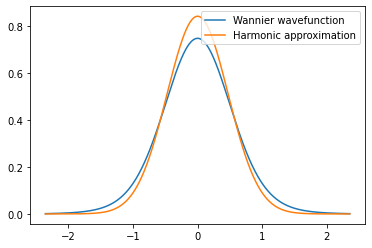

In [171]:
plt.plot(x, abs(w)**2/np.sum(abs(w)**2)/dx, label='Wannier wavefunction')

X_harmonic_sq = 1/(k_light*V0**0.5) 

plt.plot(x, np.exp(-x**2/X_harmonic_sq)/(np.sqrt(np.pi*X_harmonic_sq)), label='Harmonic approximation')

plt.legend()